# Overfitting (Sobre ajuste)

Ejemplo sickit Learn [Link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [ ]:
print(X)
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


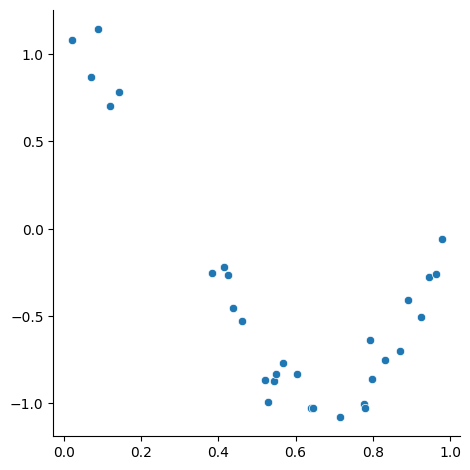

In [ ]:
# Pintamos los puntos de la muestra
import seaborn as sns
sns.relplot(x=X, y=y)

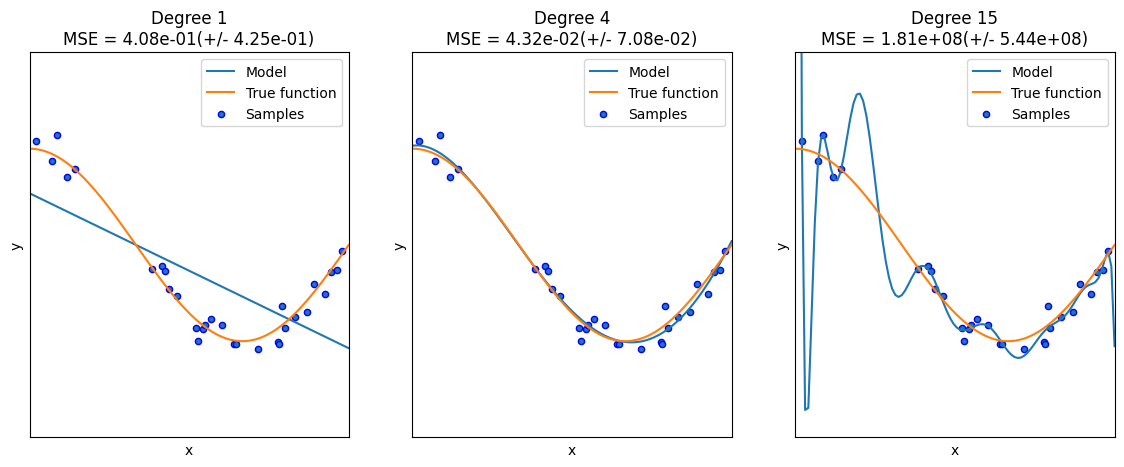

In [ ]:
# Entrenamos diferentes algoritmos (polinomios de diferentes grados)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluamos el modelo usando cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

InvalidIndexError: (slice(None, None, None), None)

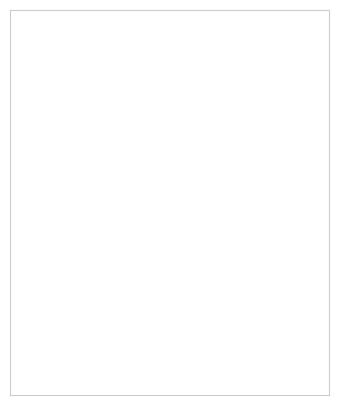

In [ ]:
# Modifica los valores numéricos de degrees para ver el overfitting

## Aquí
degrees = [2, 4, 10]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluamos los modelos usando cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Regresión Lineal

In [ ]:
# Importamos las funciones
import pandas as pd
import matplotlib.pyplot as plt

# Para que aparezca en el notebook
%matplotlib inline

In [ ]:
# Leemos los datos
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Creamos X e Y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# Seguimos los pasos de entrenamiento
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# Sacamos los coeficientes y el término constante
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


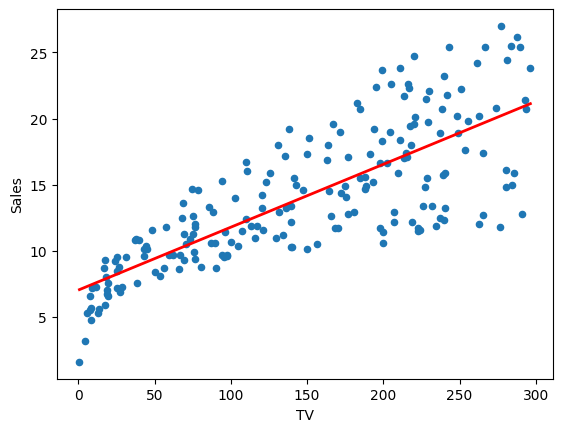

In [ ]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

# Realizar predicciones
preds = lm.predict(X_new)
preds

# Plot dato observado
data.plot(kind='scatter', x='TV', y='Sales')

# Plot ajuste
plt.plot(X_new, preds, c='red', linewidth=2)

## Comparativa entre modelos

Ejemplo de clase anterior

In [ ]:
# 1) Importar la clase
from sklearn.ensemble import RandomForestRegressor

# 2) Crear el objeto rf, de la clase RandomForestRegressor, con max_depth =2
rf = RandomForestRegressor(max_depth=2)


# 3) Utilizar la X e y anteriores
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

# Separamos train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales',axis=1),
                                                    data['Sales'],
                                                    test_size=0.25,
                                                    random_state=101)


In [ ]:
data.shape

(200, 4)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [ ]:
from sklearn.metrics import mean_squared_error
# Cargo "modelo"
rf_2 = RandomForestRegressor(max_depth=10)
lm_2 = LinearRegression(fit_intercept=True)

# Ajuste
rf_2.fit(X_train,y_train)
lm_2.fit(X_train,y_train)

# Predicción
Y_test_lm = lm_2.predict(X_test)
Y_test_rf = rf_2.predict(X_test)

# Resultado
print("LM")
print(mean_squared_error(y_test, Y_test_lm))
print("RF")
print(mean_squared_error(y_test, Y_test_rf))

# TO DO: Re-ejecuta la celda con valores de max_depth 2, 5, 8

LM
2.1086081578175144
RF
0.6003893859041672


In [ ]:
# Importamos las métricas
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Definimos el tamaño del texto de las etiquetas en los plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline
train_mse_tot = []
test_mse_tot = []
# Iteramos sobre diferentes valores de profundidad
for depth in range(1, 50):
  # Inicializamos el modelo
  clf = tree.DecisionTreeRegressor(max_depth=depth)
  cols = ['TV','Radio','Newspaper']
  # Entrenamos el modelo
  clf.fit(X_train[cols], y_train)

  # Realizamos predicciones sobre el train y el test
  train_predictions = clf.predict(X_train[cols])
  test_predictions  = clf.predict(X_test[cols])

  # Calculamos el error cuadrático medio en train y test
  train_mse = metrics.mean_squared_error(y_train, train_predictions)
  test_mse = metrics.mean_squared_error(y_test, test_predictions)

  train_mse_tot.append(train_mse)
  test_mse_tot.append(test_mse)

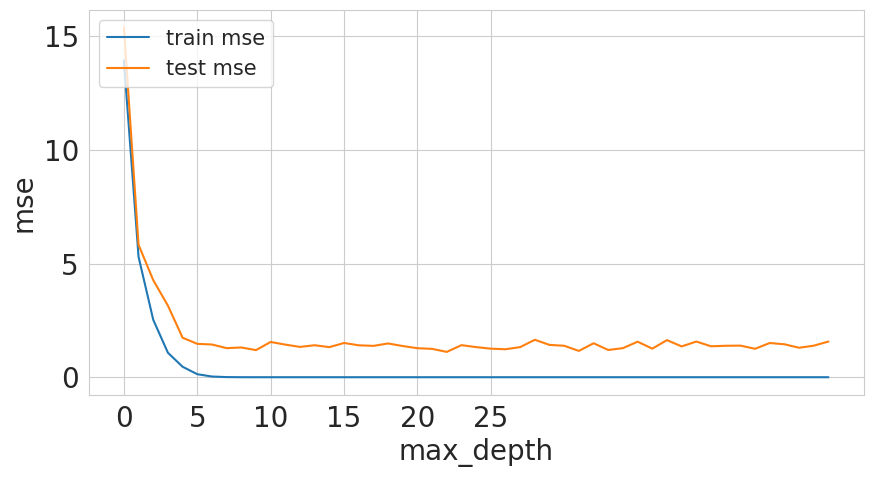

In [ ]:
# Representamos en un plot el error cuadrático medio para train y para test en función de la máxima profundidad del árbol
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_mse_tot, label="train mse")
plt.plot(test_mse_tot, label="test mse")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("mse", size=20)
plt.show()

## SobreAjuste

In [ ]:
# Preparación del dato
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')

In [ ]:
df.count()

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

In [ ]:
df = df[['Total day minutes','Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages']]
df.head()

,Total day minutes,Total day calls,Total eve calls,Total night calls,Total intl calls,Number vmail messages
0,265.1,110,99,91,3,25
1,161.6,123,103,103,3,26
2,243.4,114,110,104,5,0
3,299.4,71,88,89,7,0
4,166.7,113,122,121,3,0


In [ ]:
# Separamos las variables predictoras del target (número de minutos al día en llamadas)
X = df[['Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages' ]]
y = df[['Total day minutes']]


In [ ]:
# Separamos train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    random_state=101)

In [ ]:
X_train.head()

,Total day calls,Total eve calls,Total night calls,Total intl calls,Number vmail messages
273,104,96,101,3,0
1886,133,66,106,6,0
2305,98,95,91,3,0
535,101,138,87,1,0
130,92,114,123,2,0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2166, 5)
(2166, 1)
(1167, 5)
(1167, 1)


# Ejercicio
1. Ajusta un modelo de árbol para X_train y X_test
2. Modifica el Loop para:
  - Añadir las columnas de ajuste
  - Modificar el nombre de los objetos

3. Construye el mejor modelo posible de 1 arbol con la información anterior

In [ ]:
depth = 3

# Carga un Regressor de arbol

clf = tree.DecisionTreeRegressor(max_depth=depth)

# Añadir las columnas de predicción

cols = ['Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages' ]

# Ajustar el modelo
clf.fit(X_train[cols], y_train)

# Realizamos las predicciones en train y en test
train_predictions = clf.predict(X_train[cols])
test_predictions = clf.predict(X_test[cols])

# Calculamos el rmse en train y en test
# Por defecto la función mean_squared_error calcula el mse (excepto que se añada el parámetro squared = False que devuelve el RMSE)
train_mse = metrics.mean_squared_error(y_train, train_predictions, squared=False)
test_mse = metrics.mean_squared_error(y_test, test_predictions, squared = False)

print(train_mse)
print(test_mse)

54.58500110032589
53.962781842971125


In [ ]:
# EJERCICIO: Creamos un bucle para probar diferentes profundidades para el árbol de decisión - muy similar al ejemplo anterior donde almacenamos el rmse por cada valor de profundidad
# para train y para test en dos variables: train_mse_tot y test_mse_tot

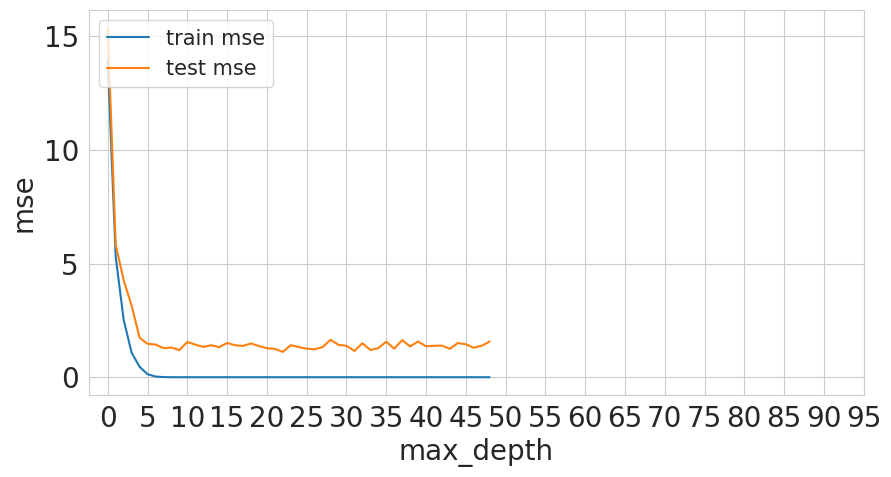

In [ ]:
# Creamos dos subplots para representar ambos
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_mse_tot, label="train mse")
plt.plot(test_mse_tot, label="test mse")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 100, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("mse", size=20)
plt.show()

### Ejercicio 3

Ajusta el mejor árbol posible para tu dataset de test

In [ ]:
### Ejercicio 3
depth = 3

# Carga un Regressor de arbol

clf = tree.DecisionTreeRegressor(max_depth=depth)

# Añadir las columnas de predicción

cols = ['Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages' ]

# Ajustar el modelo
clf.fit(X_train[cols], y_train)

# create training & test predictions
train_predictions = clf.predict(X_train[cols])
test_predictions = clf.predict(X_test[cols])

# calculate training & test mse
train_rmse = metrics.mean_squared_error(y_train, train_predictions)
test_rmse = metrics.mean_squared_error( y_test, test_predictions)

print(train_mse)
print(test_mse)

54.58500110032589
53.962781842971125


- Que pasaría si eligiera otras columnas?

# Extra Exercice
Prueba a ajustar el modelo con un Random Forest en vez de un decision tree

In [ ]:
### Ejercicio 3
depth = 3

# Carga un Regressor de arbol
from sklearn import tree

clf = RandomForestRegressor(max_depth=depth)

# Añadir las columnas de predicción

cols = ['Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages' ]

# Ajustar el modelo
clf.fit(X_train[cols], y_train)

# create training & test predictions
train_predictions = clf.predict(X_train[cols])
test_predictions = clf.predict(X_test[cols])

# calculate training & test mse
train_mse = metrics.mean_squared_error( y_train, train_predictions, squared=False)
test_mse = metrics.mean_squared_error( y_test, test_predictions, squared= False)

print(train_mse)
print(test_mse)

<ipython-input-29-062bf73929c3>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train[cols], y_train)


54.274184202135764
53.68501462609135


In [ ]:
### EJERCICIO 2

# Importamos las librerías
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

train_mse_tot = []
test_mse_tot = []

# Iterar con distintos valores de profundidad
### MODIFICAR AQUI 👇👇👇👇👇👇👇👇👇👇👇
for depth in range(1,10):
  # Inicialización
  clf = RandomForestRegressor(max_depth=depth)
  cols = ['Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages' ]
  # Entrenamiento
  clf.fit(X_train[cols], y_train)

  # Predicción
  train_predictions = clf.predict(X_train[cols])
  test_predictions  = clf.predict(X_test[cols])

  # Cálculo del mse
  train_mse = metrics.mean_squared_error( y_train, train_predictions)
  test_mse = metrics.mean_squared_error(y_test, test_predictions)

  # mse por iteración
  train_mse_tot.append(train_mse)
  test_mse_tot.append(test_mse)


<ipython-input-30-1d1e64c2d0e5>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train[cols], y_train)
<ipython-input-30-1d1e64c2d0e5>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train[cols], y_train)
<ipython-input-30-1d1e64c2d0e5>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train[cols], y_train)
<ipython-input-30-1d1e64c2d0e5>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train[cols], y_train)
<ipython-input-30-1d1e64c2d0e5>:24: DataConversionWarning: A column-vector y was passed when a 1d ar

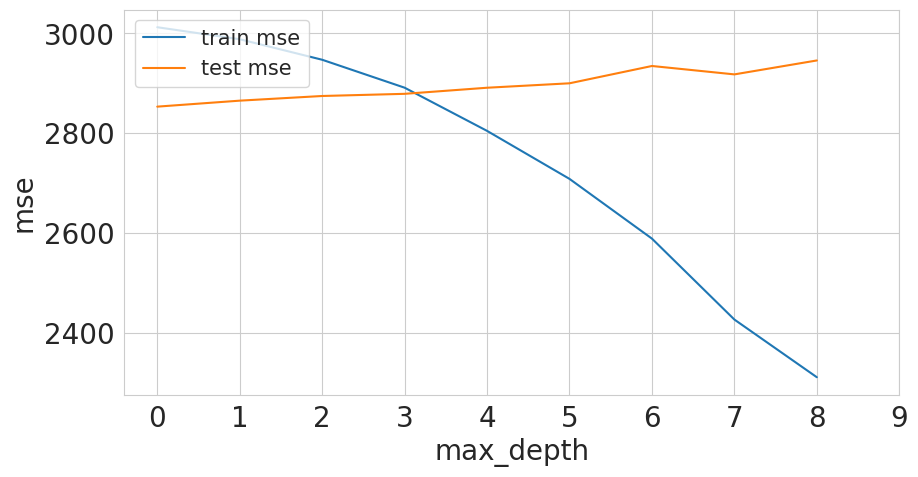

In [ ]:
# Creamos dos plots para el mse en train y en test
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_mse_tot, label="train mse")
plt.plot(test_mse_tot, label="test mse")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 10, 1))
plt.xlabel("max_depth", size=20)
plt.ylabel("mse", size=20)
plt.show()